In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
import seaborn as sns
sns.set_style("whitegrid")
import pandas as pd
import random
import numpy as np

0.502


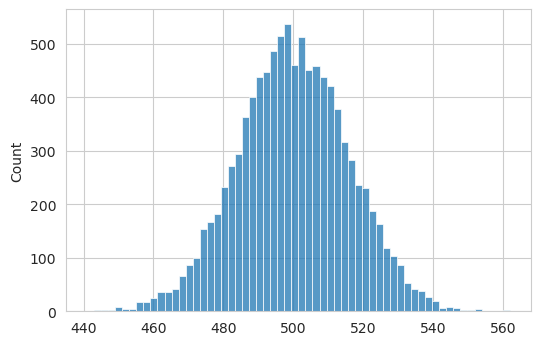

In [6]:
# Tossing a coin (slow code for clarity; see the second die example for fast code)

import random

n_games = 10000
n_tosses = 1000

tails_per_game = []
for i_game in range(n_games):
    n_tails = 0
    for i in range(n_tosses):
        toss = random.randint(0, 1)
        n_tails += 1 if toss == 0 else 0
    tails_per_game.append(n_tails)
        
sns.histplot(tails_per_game)

print(tails_per_game[0] / n_tosses)


<AxesSubplot:ylabel='Count'>

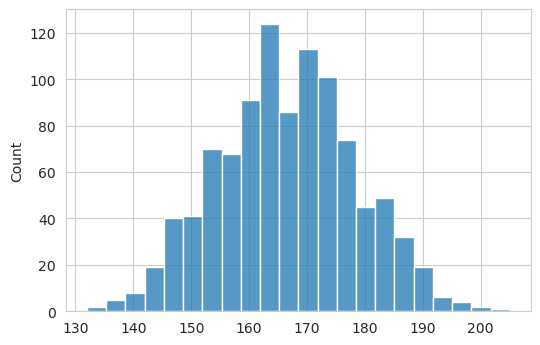

In [7]:
# Rolling a die

import random

n_games = 1000
n_rolls = 1000

fours_per_game = []
for i_game in range(n_games):
    n_fours = 0
    for i in range(n_rolls):
        roll = random.randint(1, 6)
        n_fours += 1 if roll == 4 else 0
    fours_per_game.append(n_fours)
        
sns.histplot(fours_per_game)

# The average number of fours in a hundred rolls is about 16.
# That looks about right, since we "expect" to see about 100/6 = 16 + 2/3
# fours. But we see that in a 1000 games the number ranges between 
# as low as 5 and as high as 29

<AxesSubplot:ylabel='Count'>

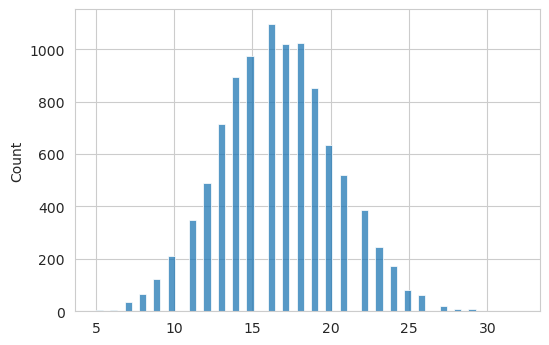

In [8]:
n_games = 10000
n_rolls = 100

games = np.random.randint(1, 6 + 1, size=(n_games, n_rolls))
sns.histplot((games == 4).sum(axis=1))

[0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.
 0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.01 0.   0.   0.01 0.   0.01 0.   0.   0.   0.   0.
 0.01 0.   0.   0.   0.   0.   0.01 0.   0.01 0.   0.   0.   0.   0.
 0.01 0.01 0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.01 0.
 0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.01 0.   0.01 0.   0.
 0.01 0.01]
0.19000000000000003


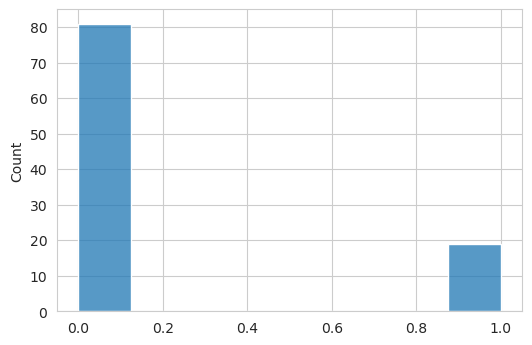

In [9]:
# a quick Ber(p) random variable generator
import numpy as np

def randber(shape, p=0.5):
    u = np.random.rand(*shape)
    u[u < 1 - p] = 0
    u[u >= 1 - p] = 1

    return np.int64(u)


n = 100
p = 0.2
handedness = randber((n,), p)
sns.histplot(handedness)

print(handedness / n)
print((handedness / n).sum())

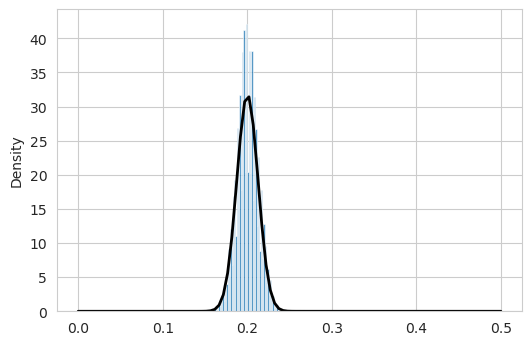

In [10]:
n_experiments = 10000
n = 1000

handedness = randber((n_experiments, n), 0.2)

sns.histplot(handedness.mean(axis=1), stat='density')

avg = handedness.mean()
stderr = handedness.mean(axis=1).std()

x = np.linspace(0, 0.5, 100)
plt.plot(x, 
         np.exp(-(x - avg)**2 / (2*stderr**2)) / (np.sqrt(2*np.pi)*stderr),
         'k', linewidth=2
        )

# imagine that we ran the experiment when mother nature was 
# handing out the values on the left or on the right!
# -> motivation for the "right" definition of confidence intervals!
